In [2]:
import sys
sys.path.append('../')

import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

import esda
from pysal.lib import weights
from splot.esda import lisa_cluster

from src.utils import load_file
from src import get_graph as gg
from src import graphlet_degree as gd
from src.orcalib import orca

/Users/gsagostini/opt/anaconda3/envs/urban-graphlets/lib/python3.9/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/Users/gsagostini/opt/anaconda3/envs/urban-graphlets/lib/python3.9/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Make Images for Paper Draft

Get the graph and count graphlets:

In [3]:
graph_NY = gg.simplify_graph(ox.graph_from_place('New York City, United States', network_type='drive'))
graph_NY_withGDV, node_gdf_NY = gd.add_GDV(graph_NY)

/Users/gsagostini/Desktop/urban-graphlets/notebooks/../src/get_graph.py:57: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  H1 = ox.consolidate_intersections(H, tolerance=tol, dead_ends=True)


Get neighbor relations and spatial weights:

In [4]:
graph_NY_und = ox.get_undirected(graph_NY_withGDV)
NY_neighbors_dict = {pairs[0]: list(pairs[1].keys()) for pairs in graph_NY_und.adjacency()}
NY_weights_from_graph = weights.W(neighbors=NY_neighbors_dict)

## 1. Graphlet Degree Distributions

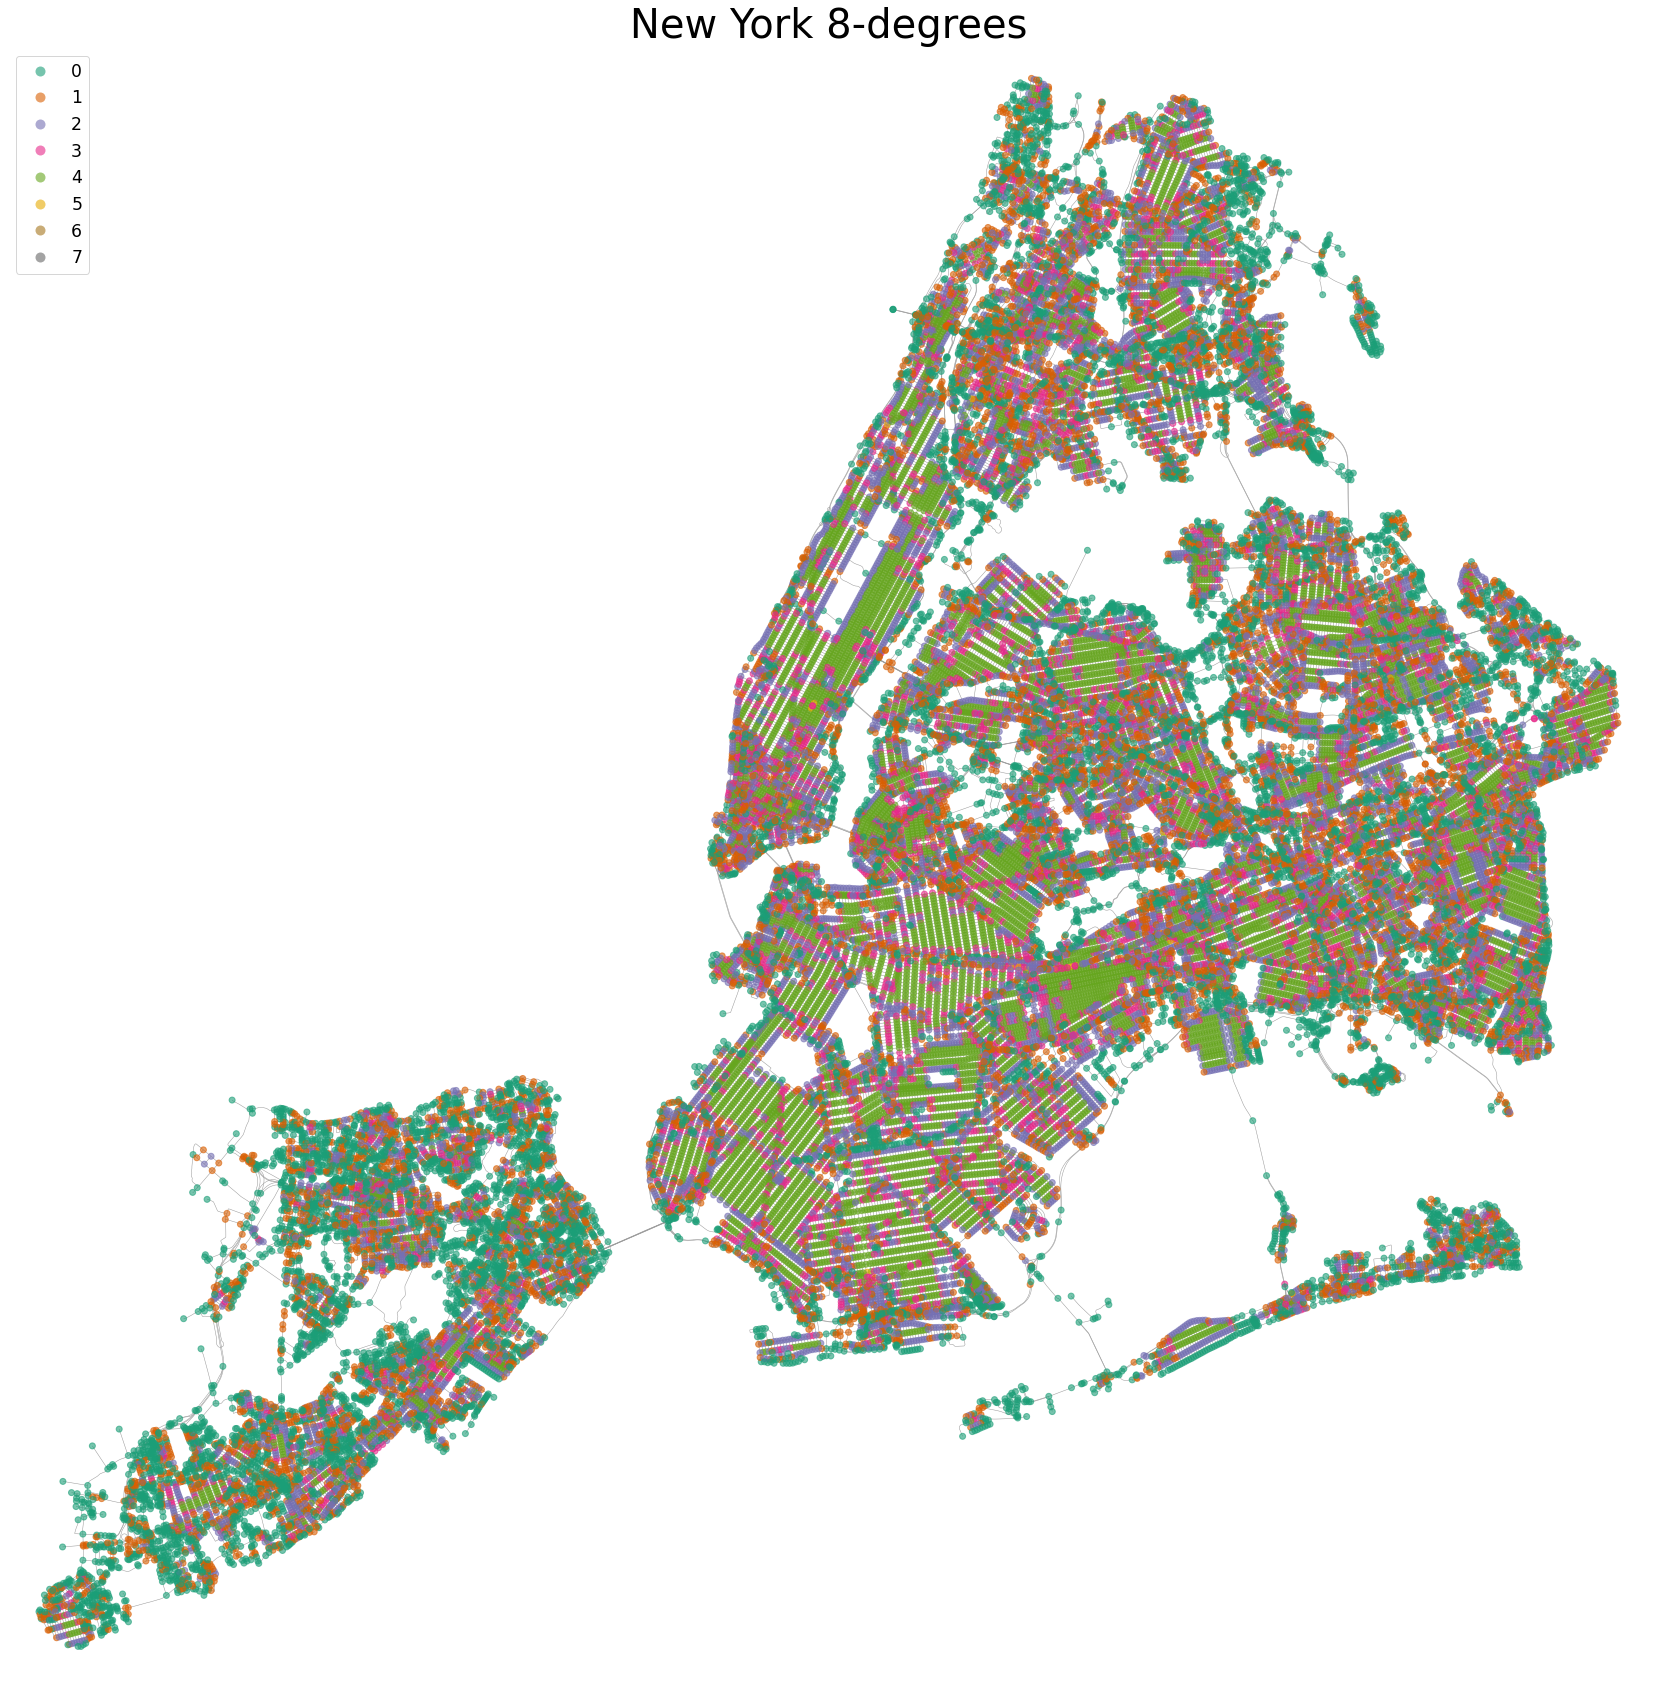

In [24]:
square_degrees = [0, 1, 2, 3, 4, 5, 6, 7]

fig, ax = plt.subplots(figsize=(30, 30))
ax = ox.plot_graph(graph_NY_withGDV, node_size=0, edge_linewidth=0.5, ax=ax, show=False)[1]
ax = node_gdf_NY.plot(column=8, ax=ax, categorical=True, categories=square_degrees, cmap='Dark2', alpha=0.6,
                     legend=True, legend_kwds={'loc':'upper left', 'fontsize':'xx-large'})
#ax.legend().get_title().set_fontsize(20)

ax.set_title('New York 8-degrees', fontsize=40)
plt.savefig('figures/graphlet_degree-8.png')

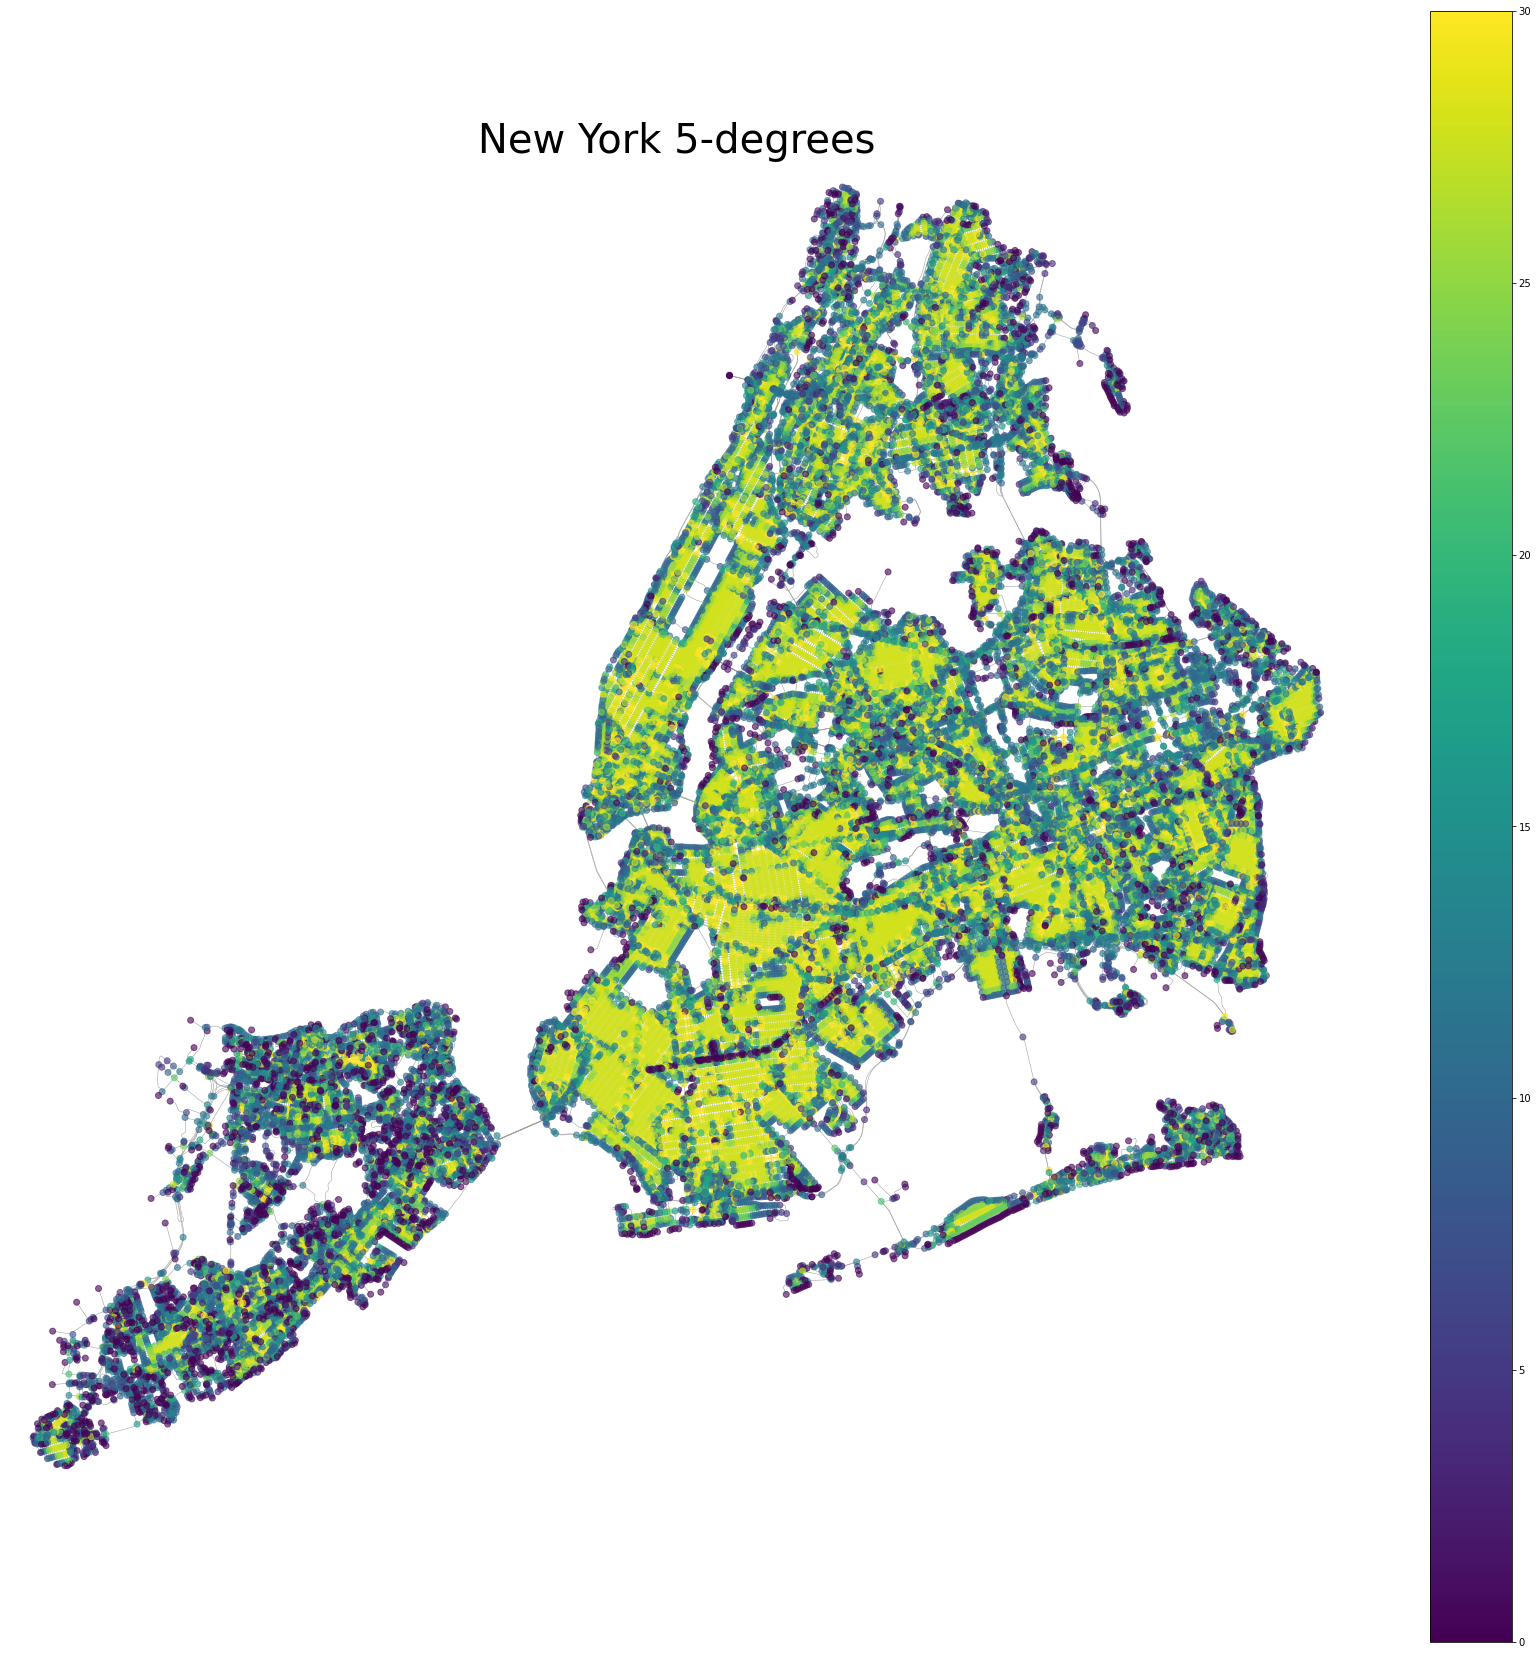

In [32]:
fig, ax = plt.subplots(figsize=(30, 30))
ax = ox.plot_graph(graph_NY_withGDV, node_size=0, edge_linewidth=0.5, ax=ax, show=False)[1]
ax = node_gdf_NY.plot(column=5, ax=ax, alpha=0.6, legend=True, vmax=30)

ax.set_title('New York 5-degrees', fontsize=40)
plt.savefig('figures/graphlet_degree-5.png')

## 2. Graphlet LISA Indicators

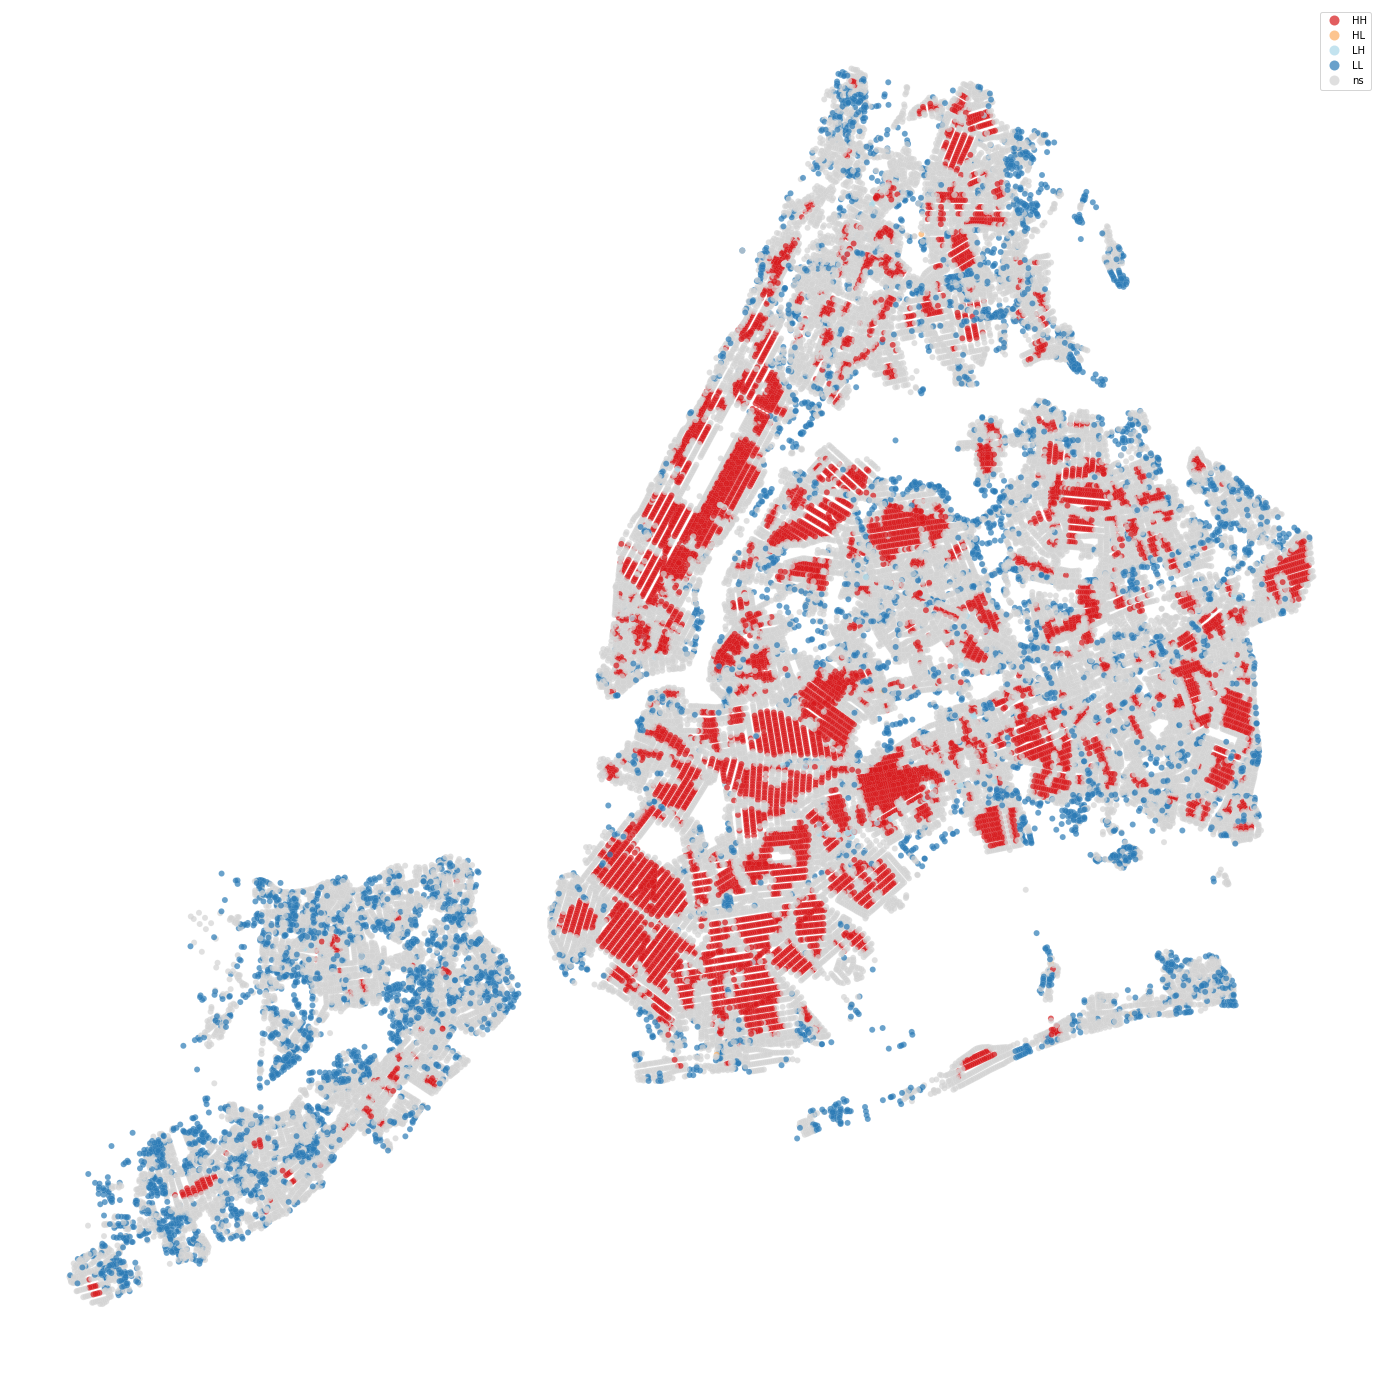

<Figure size 432x288 with 0 Axes>

In [26]:
moran_loc_ntwwn_square = esda.moran.Moran_Local(node_gdf_NY[8].values, NY_weights_from_graph)
fig, ax = lisa_cluster(moran_loc_ntwwn_square, node_gdf_NY.copy(), figsize=(25,25), alpha=.7)
plt.show()
plt.savefig('figures/lisa-8.png')

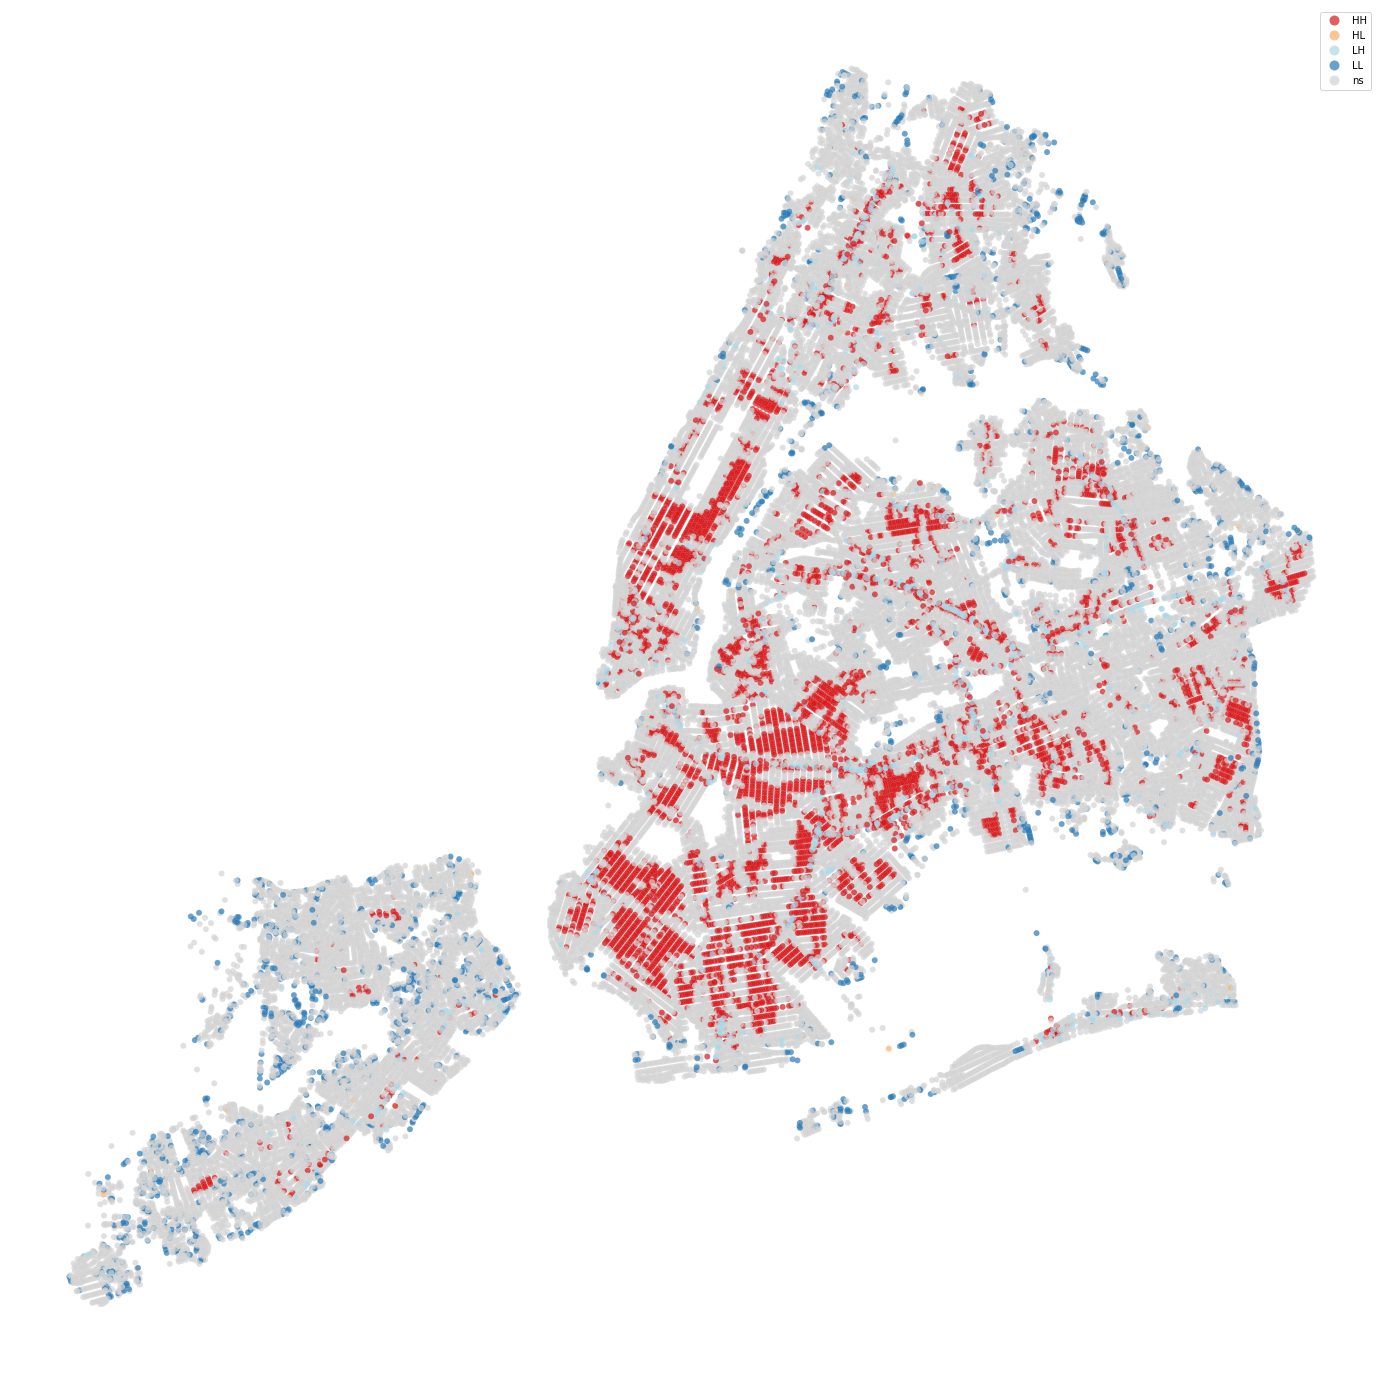

<Figure size 432x288 with 0 Axes>

In [27]:
moran_loc_ntwwn_path = esda.moran.Moran_Local(node_gdf_NY[5].values, NY_weights_from_graph)
fig, ax = lisa_cluster(moran_loc_ntwwn_path, node_gdf_NY.copy(), figsize=(25,25), alpha=.7)
plt.show()
plt.savefig('figures/lisa-5.png')